<a href="https://colab.research.google.com/github/alejandroariaszuluaga/Machine-Learning/blob/master/reto5_generos_musicales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Reto 5: Clasificación de géneros musicales a partir de redes neuronales con scikit-learn**

In [ ]:
!wget http://millionsongdataset.com/sites/default/files/AdditionalFiles/msd_genre_dataset.zip
!unzip msd_genre_dataset.zip
!cat msd_genre_dataset.txt | grep -E 'jazz and blues|soul and reggae' > filter_data.csv

--2019-11-26 14:14:52--  http://millionsongdataset.com/sites/default/files/AdditionalFiles/msd_genre_dataset.zip
Resolving millionsongdataset.com (millionsongdataset.com)... 173.231.209.32
Connecting to millionsongdataset.com (millionsongdataset.com)|173.231.209.32|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12656044 (12M) [application/zip]
Saving to: ‘msd_genre_dataset.zip’

msd_genre_dataset.z 100%[===================>]  12.07M  37.2MB/s    in 0.3s    

2019-11-26 14:14:52 (37.2 MB/s) - ‘msd_genre_dataset.zip’ saved [12656044/12656044]

Archive:  msd_genre_dataset.zip
  inflating: msd_genre_dataset.txt   


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import io
import numpy as np

In [ ]:
nombres = ['y','ID','Author','Name','x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15','x16','x17','x18','x19','x20','x21','x22','x23','x24','x25','x26','x27','x28','x29','x30']
datos = pd.read_csv('filter_data.csv', names = nombres)
datos = datos.reindex(np.random.permutation(datos.index))

In [ ]:
data_array = datos.values

#Se ignora el artista, la ID y el nombre de la canción
relevant_data_0 = np.array([np.delete(x, [1,2,3]) for x in data_array])

#Selección de los géneros de interés y conversión a notación binaria (jazz and blues=0, soul and reggae=1)
relevant_data_1 = relevant_data_0
for x in relevant_data_0:
  if x[0] == 'jazz and blues':
    x[0] = 0
  elif x[0] == 'soul and reggae':
    x[0] = 1


In [ ]:
from sklearn import preprocessing
relevant_data_1 = (relevant_data_1.astype(np.float))

#Separación de datos de entrenamiento, validación y de prueba
trainX = relevant_data_1[2000:,1:]
trainX_normalized = ( trainX - np.mean(trainX) ) / np.std(trainX)
trainY = relevant_data_1[2000:,0]

validationX = relevant_data_1[:1000,1:]
validationY = relevant_data_1[:1000,0]

testX = relevant_data_1[1000:2000,1:]
testY = relevant_data_1[1000:2000,0]

In [ ]:
len(testX)

1000

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

Nmin = 2
Nmax = 50
n_max_ac = 0
max_ac = 0
vector_val_ac = []
vector_train_ac = []

for n in range(Nmin,Nmax):
  clf = MLPClassifier(activation='relu', solver='lbfgs', hidden_layer_sizes=(n,1))
  clf.fit(trainX_normalized, trainY)
  
  pred_val_Y = clf.predict(validationX_normalized)
  pred_train_Y = clf.predict(trainX_normalized[:1000])
  
  train_ac = accuracy_score(validationY,pred_train_Y)
  val_ac = accuracy_score(validationY,pred_val_Y)
  
  vector_train_ac.append(train_ac)
  vector_val_ac.append(val_ac)
  if val_ac>max_ac:
    max_ac = val_ac
    n_max_ac = n

best_clf = MLPClassifier(activation='relu', solver='lbfgs', hidden_layer_sizes=(n_max_ac,1))
best_clf.fit(trainX_normalized,trainY)
predY = best_clf.predict(testX_normalized)

Precisión a partir de un entrenamiento con:
-> 35 neuronas. Validación: 0.814 Test: 0.833


Text(0, 0.5, 'Precisión con datos de validación')

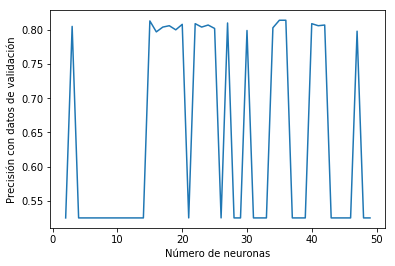

In [ ]:
print("Precisión a partir de un entrenamiento con:")
print("->",n_max_ac,"neuronas. Validación:", max_ac, "Test:",accuracy_score(testY,predY))

plt.plot(range(Nmin,Nmax), vector_val_ac)
plt.xlabel('Número de neuronas')
plt.ylabel('Precisión con datos de validación')

In [ ]:
Nmin = 2
Nmax = 50
n_max_ac = 0
max_ac = 0
vector_val_ac = [[],[],[]]
vector_train_ac = [[],[],[]]

for n in range(Nmin,Nmax):
  for num_lay in range(2,5):
    clf = MLPClassifier(activation='relu', solver='lbfgs', hidden_layer_sizes=(n,num_lay))
    clf.fit(trainX_normalized, trainY)

    pred_val_Y = clf.predict(validationX_normalized)
    pred_train_Y = clf.predict(trainX_normalized[:1000])

    train_ac = accuracy_score(validationY,pred_train_Y)
    val_ac = accuracy_score(validationY,pred_val_Y)

    vector_train_ac[num_lay-2].append(train_ac)
    vector_val_ac[num_lay-2].append(val_ac)
    if val_ac>max_ac:
      max_ac = val_ac
      n_max_ac = n
      num_lay_max_ac = num_lay

best_clf = MLPClassifier(activation='relu', solver='lbfgs', hidden_layer_sizes=(n_max_ac,1))
best_clf.fit(trainX_normalized,trainY)
predY = best_clf.predict(testX_normalized)

Precisión a partir de un entrenamiento con:
-> 4 capas escondidas y 7 neuronas. Validación: 0.816 Test: 0.541


Text(0, 0.5, 'Precisión con datos de validación')

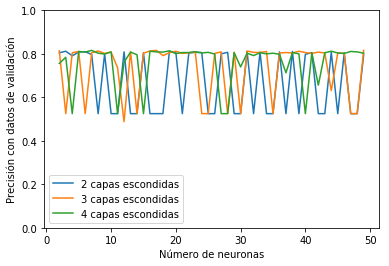

In [ ]:
print("Precisión a partir de un entrenamiento con:")
print("->",num_lay_max_ac,"capas escondidas y",n_max_ac,"neuronas. Validación:", max_ac, "Test:",accuracy_score(testY,predY))

fig, ax = plt.subplots()
ax.plot(range(Nmin,Nmax), vector_val_ac[0], label='2 capas escondidas')
ax.plot(range(Nmin,Nmax), vector_val_ac[1], label='3 capas escondidas')
ax.plot(range(Nmin,Nmax), vector_val_ac[2], label='4 capas escondidas')
leg = ax.legend()

plt.ylim(0,1)
plt.xlabel('Número de neuronas')
plt.ylabel('Precisión con datos de validación')

Precisión a partir de un entrenamiento con:
-> 2 capas escondidas y 2 neuronas. Validación: 0.815 Test: 0.823


Text(0, 0.5, 'Precisión con datos de validación')

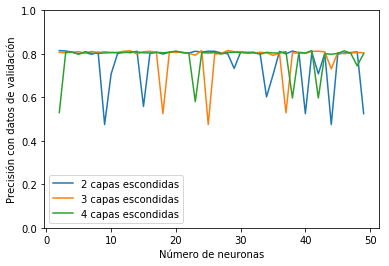

In [ ]:
Nmin = 2
Nmax = 50
n_max_ac = 0
max_ac = 0
vector_val_ac = [[],[],[]]
vector_train_ac = [[],[],[]]

for n in range(Nmin,Nmax):
  for num_lay in range(2,5):
    clf = MLPClassifier(activation='logistic', solver='lbfgs', hidden_layer_sizes=(n,num_lay))
    clf.fit(trainX_normalized, trainY)

    pred_val_Y = clf.predict(validationX_normalized)
    pred_train_Y = clf.predict(trainX_normalized[:1000])

    train_ac = accuracy_score(validationY,pred_train_Y)
    val_ac = accuracy_score(validationY,pred_val_Y)

    vector_train_ac[num_lay-2].append(train_ac)
    vector_val_ac[num_lay-2].append(val_ac)
    if val_ac>max_ac:
      max_ac = val_ac
      n_max_ac = n
      num_lay_max_ac = num_lay

best_clf = MLPClassifier(activation='logistic', solver='lbfgs', hidden_layer_sizes=(n_max_ac,1))
best_clf.fit(trainX_normalized,trainY)
predY = best_clf.predict(testX_normalized)

print("Precisión a partir de un entrenamiento con:")
print("->",num_lay_max_ac,"capas escondidas y",n_max_ac,"neuronas. Validación:", max_ac, "Test:",accuracy_score(testY,predY))

fig, ax = plt.subplots()
ax.plot(range(Nmin,Nmax), vector_val_ac[0], label='2 capas escondidas')
ax.plot(range(Nmin,Nmax), vector_val_ac[1], label='3 capas escondidas')
ax.plot(range(Nmin,Nmax), vector_val_ac[2], label='4 capas escondidas')
leg = ax.legend();

plt.ylim(0,1)
plt.xlabel('Número de neuronas')
plt.ylabel('Precisión con datos de validación')

Precisión a partir de un entrenamiento con:
-> 2 capas escondidas y 15 neuronas. Validación: 0.815 Test: 0.839


Text(0, 0.5, 'Precisión con datos de validación')

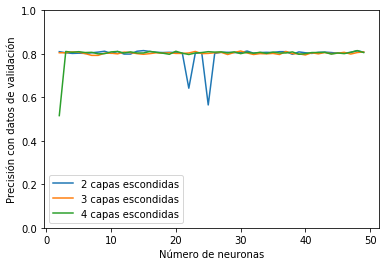

In [ ]:
Nmin = 2
Nmax = 50
n_max_ac = 0
max_ac = 0
vector_val_ac = [[],[],[]]
vector_train_ac = [[],[],[]]

for n in range(Nmin,Nmax):
  for num_lay in range(2,5):
    clf = MLPClassifier(activation='tanh', solver='lbfgs', hidden_layer_sizes=(n,num_lay))
    clf.fit(trainX_normalized, trainY)

    pred_val_Y = clf.predict(validationX_normalized)
    pred_train_Y = clf.predict(trainX_normalized[:1000])

    train_ac = accuracy_score(validationY,pred_train_Y)
    val_ac = accuracy_score(validationY,pred_val_Y)

    vector_train_ac[num_lay-2].append(train_ac)
    vector_val_ac[num_lay-2].append(val_ac)
    if val_ac>max_ac:
      max_ac = val_ac
      n_max_ac = n
      num_lay_max_ac = num_lay

best_clf = MLPClassifier(activation='tanh', solver='lbfgs', hidden_layer_sizes=(n_max_ac,1))
best_clf.fit(trainX_normalized,trainY)
predY = best_clf.predict(testX_normalized)

print("Precisión a partir de un entrenamiento con:")
print("->",num_lay_max_ac,"capas escondidas y",n_max_ac,"neuronas. Validación:", max_ac, "Test:",accuracy_score(testY,predY))

fig, ax = plt.subplots()
ax.plot(range(Nmin,Nmax), vector_val_ac[0], label='2 capas escondidas')
ax.plot(range(Nmin,Nmax), vector_val_ac[1], label='3 capas escondidas')
ax.plot(range(Nmin,Nmax), vector_val_ac[2], label='4 capas escondidas')
leg = ax.legend();

plt.ylim(0,1)
plt.xlabel('Número de neuronas')
plt.ylabel('Precisión con datos de validación')